In [6]:
from datetime import datetime
from qiskit import *
import qiskit as qk
from qiskit.providers.aer import QasmSimulator
import networkx as nx
import numpy as np
import math
from QAOAMaxKCutBinary_original import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import json as js
import os.path

import Simulations as si
import QAOABase as qb
import QAOAMaxKCutBinary_original as qmbko

import importlib
importlib.reload(si)
importlib.reload(qb)
importlib.reload(qmbko)

<module 'QAOAMaxKCutBinary_original' from '/home/charles/EDF/QAOAMaxKCutBinary_original.py'>

In [7]:
G = nx.read_gml("Erdos-Renyi.gml")
k_cuts_range = range(2,7)

si.test_erdos_renyi(k_cuts_range)

 60%|██████    | 3/5 [06:13<04:05, 122.94s/it]Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Insufficient memory to run circuit  using the statevector simulator. Required memory: 65536M, max memory: 6082M
 60%|██████    | 3/5 [06:14<04:09, 124.88s/it]


QiskitError: 'ERROR:  [Experiment 0] Insufficient memory to run circuit  using the statevector simulator. Required memory: 65536M, max memory: 6082M ,  ERROR: Insufficient memory to run circuit  using the statevector simulator. Required memory: 65536M, max memory: 6082M'

In [ ]:
import json
with open("scs_4_range(2, 4)_range(2, 4)_1_None_False_2022-08-22 13:26:02.130618/results.json") as d:
    data = json.load(d)
    # for i in clique_size_range:
    for k in k_cuts_range:
        print(data[0]["clique de taille " + repr(3) + ", k="+ repr(k)]["alpha"])

In [ ]:
############################## Simulations nuit 18-08 -- 19-08 ###################################### 

nb_nodes= 10
clique_size_range = [3,5,7,9]
k_cuts_range = range(2,9)
depth_range = [2]
noisemodel= None
with_random_weights= False
for r in depth_range:
    si.simulation_clique_size(nb_nodes, clique_size_range, k_cuts_range, r, noisemodel, with_random_weights)

In [ ]:
############################## Simulations nuit 18-08 -- 19-08 ###################################### 

nb_nodes= 10
nb_cliques_range = range(2,5)
clique_sizes= range(2,6)
k_cuts_range = range(2,6)
r= 4
noisemodel= None
with_random_weights= False

for i in clique_sizes:
    if((i*j <= nb_nodes) for j in nb_cliques_range):
        si.simulation_number_of_cliques(nb_nodes, nb_cliques_range, k_cuts_range, r, i, noisemodel, with_random_weights)

In [ ]:
from qiskit import IBMQ, Aer
from qiskit.providers.aer.noise import NoiseModel

provider = Aer
print(Aer.backends())
backend = provider.get_backend(AerSimulator('aer_simulator_unitary'))
noise_model = NoiseModel.from_backend(backend)
print(noise_model)

In [ ]:
# representation graphique pour max 2cut

from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

qaoa = qmbko.QAOAMaxKCutOnehot()
H = si.one_clique_graph(nb_nodes= 10, clique_size = 6, with_random_weights =False)
params={'H': H}
qasm_sim = Aer.get_backend('qasm_simulator')

scl = qaoa.sample_cost_landscape(qasm_sim, 1024, params=params, angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi,20]})

In [ ]:
from Utilities import getNumberOfControlledGates

nb_nodes =4
clique_size_range = range(2,4)
k_cuts_range = range(2,4)
r = 1
noisemodel= None
with_random_weights= False


test_class = qmbko.QAOAMaxKCutOnehot()
G = si.one_clique_graph(nb_nodes, clique_size= 4,with_random_weights= True )
params= {'G': G, 'k_cuts': 2}
C = test_class.createCircuit(test_class.random_init([2*np.pi, 2*np.pi], [np.pi, np.pi],2), 2, params=params)
S = qk.utils.summarize_circuits(C)
print(S)

print(getNumberOfControlledGates(C)["0-th circuit"])
# print(S)
# nb_gates = []
# for g in {"cx", "x", "rx", "cu3", "h"}:
#         if(g in S):
#             nb_gates += [g + ': ' + repr(C.count_ops()[g])]
# nb_gates = C.count_ops()
# print(nb_gates)

# print(C.count_ops())

In [139]:
nb_nodes =10
K = si.one_clique_graph(nb_nodes, clique_size= 4,with_random_weights= True )
print((test_class.random_init([2*np.pi,2*np.pi], [np.pi,np.pi], depth=2)))
C = test_class.createCircuit(test_class.random_init([2*np.pi,2*np.pi], [np.pi,np.pi], depth=2), 2, params=params)

[6.28318531 3.14159265 6.28318531 3.14159265]


In [145]:
interp = test_class.interp(test_class.random_init([2*np.pi,2*np.pi], [np.pi,np.pi], depth=2))
print(interp)

[6.28318531 3.92699082 4.71238898 5.49778714 3.14159265]


In [6]:
importlib.reload(si)
importlib.reload(qb)
importlib.reload(qmbko)

<module 'QAOAMaxKCutBinary_original' from '/home/charles/EDF/QAOAMaxKCutBinary_original.py'>

In [44]:
nb_nodes = 12
# nb_cliques_range = range(2,5)
nb_cliques_range = range(2,5)
k_cuts_range = range(2,7)
r = 1 
s = 3
# puis s = 4,5
noisemodel= None
with_random_weights= False

# M= si.many_clique_graph(nb_nodes, nb_cliques =3, clique_size =3, with_random_weights =False)
O = many_clique_graph2(nb_nodes, nb_cliques = 3, clique_size = 3, with_random_weights =False)
max = list(nx.enumerate_all_cliques(O))[-1]
print(max)
print(nx.is_connected(O))
print(list(enumerate_all_cliques(O)))

[2, 3, 4, 5]
True
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [1, 4], [1, 7], [2, 3], [2, 4], [2, 5], [2, 6], [2, 10], [3, 4], [3, 5], [4, 5], [5, 6], [5, 11], [6, 7], [6, 8], [6, 9], [7, 8], [0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4], [2, 3, 5], [2, 4, 5], [2, 5, 6], [3, 4, 5], [6, 7, 8], [0, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 5]]


In [7]:
nb_nodes = 12
# nb_cliques_range = range(2,5)
nb_cliques_range = range(2,5)
k_cuts_range = range(2,7)
r = 1 
s = 3
# puis s = 4,5
noisemodel= None
with_random_weights= False

# M= si.many_clique_graph(nb_nodes, nb_cliques =3, clique_size =3, with_random_weights =False)
O = si.many_clique_graph(nb_nodes, nb_cliques = 3, clique_size = 3, with_random_weights =False)
max = list(nx.enumerate_all_cliques(O))[-1]
print(max)
print(nx.is_connected(O))


[0, 3, 4, 5]
True


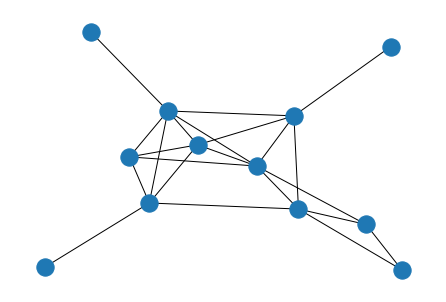

[[0, 10], [0, 4, 2, 1], [0, 4, 2, 3], [0, 4, 5, 3], [6, 8, 7], [6, 1], [6, 3, 5], [6, 3, 7], [9, 1], [11, 5]]


In [8]:

nx.draw(O)
plt.show()
m = nx.find_cliques(O)
print(list(m))

In [21]:
import cvxopt
import cvxpy
print(cvxpy.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCIPY', 'SCS']


In [ ]:
import GoemansWilliamson as gw
import scipy
import scipy.sparse as sp 
from quantumflow.utils import from_graph6
test_class = sp.coo_array()

gw.goemans_williamson(from_graph6(r"My]WObEnkmHl}i}\_"))

In [ ]:

from scipy.sparse import coo_array
G = nx.read_gml("scs_8_[2, 3, 5, 7]_range(2, 7)_1_None_False_2022-08-22 16:00:04.437913/clique de taille 2.gml")
gw.goemans_williamson(G) # -> Tuple[np.ndarray, float, float]


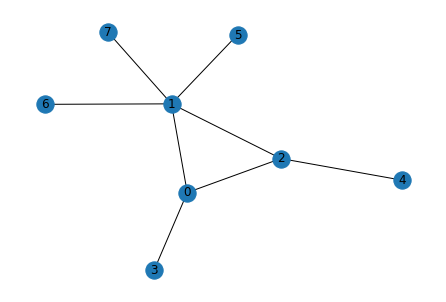

In [8]:

import json
c=3
k=6
G_path =""
Results_path= f"Results/clique de taille {c}.json" 
with open(Results_path) as d:
    data = json.load(d)
    G_path = data[0]["clique de taille " + repr(c) + ", k=" + repr(k)]["graph_path"]
    G = nx.read_gml(G_path)
    nx.draw(G, with_labels= True)
    plt.show()

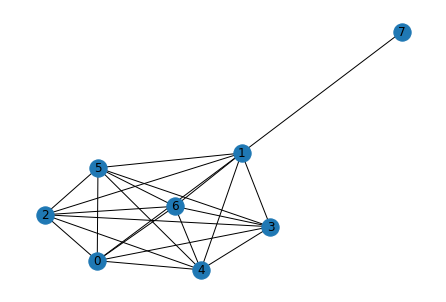

In [25]:
c=7
k=6
G_path =""
Results_path= f"Results/clique de taille {c}.json" 
with open(Results_path) as d:
    data = json.load(d)
    G_path = data[0]["clique de taille " + repr(c) + ", k=" + repr(k)]["graph_path"]
    G = nx.read_gml(G_path)
    nx.draw(G, with_labels= True)
    plt.show()

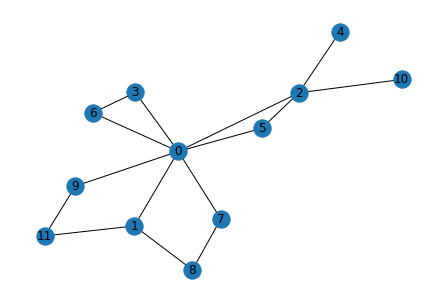

[['0', '2', '5'], ['0', '3', '6'], ['0', '1'], ['0', '7'], ['0', '9'], ['4', '2'], ['10', '2'], ['8', '1'], ['8', '7'], ['11', '1'], ['11', '9']]


In [4]:

cr=2
cs=3
G_path =f"[12]_nb_cliques[{cr}]_clique_size[{cs}].gml" 
G = nx.read_gml(G_path)
nx.draw(G, with_labels= True)
plt.show()
print(list(nx.find_cliques(G)))